In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

Here we import all our helper functions

In [2]:
from main import *



## import raw data
Using standard python csv module

In [3]:
n = 50
fn = "data/randomSampleSta10.csv"

In [4]:
x, y, z = importCsv(fn)

## convert from cartesian to spherical coordinates
Using Astropy!

In [5]:
r, az, el = cart2sph(x, y, z)

min/max lats (radians) -1.427986415093525 -0.015847818784296374
lngs range (radians) -1.57079632679 1.57079632679
min/max lngs (radians) 2.0861676844429624 4.1972234265367
lats range (radians) 0 6.28318530718


## this makes the job of smoothing easier
Since all points are unique in this space.  Here we rolled our own smoothing,
but are using Dask to make it faster.

In [6]:
azLoc, elLoc, rSmooth = smooth(az, el, r, n)

J: 0
J: 1
J: 2
J: 3
J: 4
J: 5
J: 6
J: 7
J: 8
J: 9
J: 10
J: 11
J: 12
J: 13
J: 14
J: 15
J: 16
J: 17
J: 18
J: 19
J: 20
J: 21
J: 22
J: 23
J: 24
J: 25
J: 26
J: 27
J: 28
J: 29
J: 30
J: 31
J: 32
J: 33
J: 34
J: 35
J: 36
J: 37
J: 38
J: 39
J: 40
J: 41
J: 42
J: 43
J: 44
J: 45
J: 46
J: 47
J: 48
J: 49
[########################################] | 100% Completed | 47.8s
[########################################] | 100% Completed |  0.1s


Exception RuntimeError: RuntimeError('cannot join current thread',) in <Finalize object, dead> ignored


## visualize smoothed surface
this is what our dish looks like in spherical coords, smoothed out
from the original data in cartesian

<IPython.core.display.Javascript object>


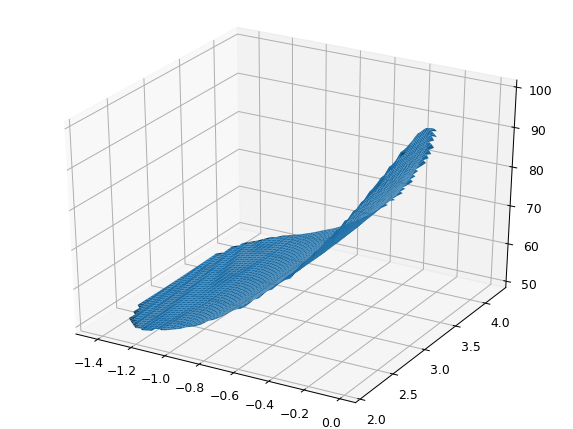

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(azLoc, elLoc, rSmooth)

## put our smoothed surface back to XYZ

In [8]:
xs, ys, zs = sph2cart(azLoc, elLoc, rSmooth)

min/max az (radians) -1.427986415093525 -0.015847818784296374
el range (radians) -1.57079632679 1.57079632679
min/max el (radians) 2.0861676844429624 4.1972234265367
az range (radians) 0 6.28318530718


<IPython.core.display.Javascript object>


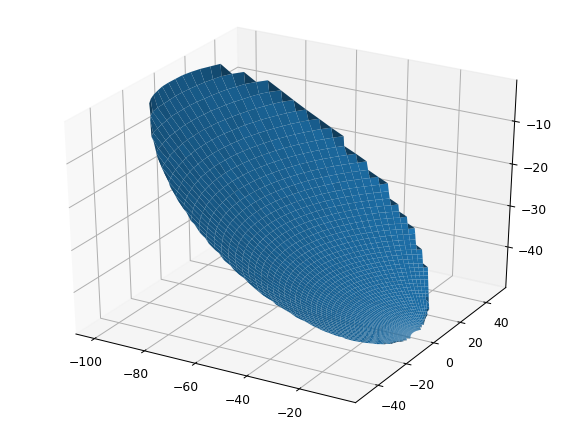

In [9]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(xs, ys, zs)

## but look how it's not evenly spaced!

<IPython.core.display.Javascript object>


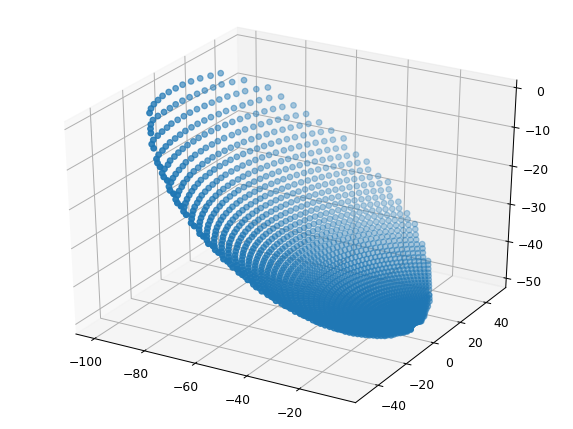

In [10]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(xs, ys, zs)

## which we think screws up our attempt at fitting zernikes to this surface
we don't think this really describes our surface very well.

<IPython.core.display.Javascript object>


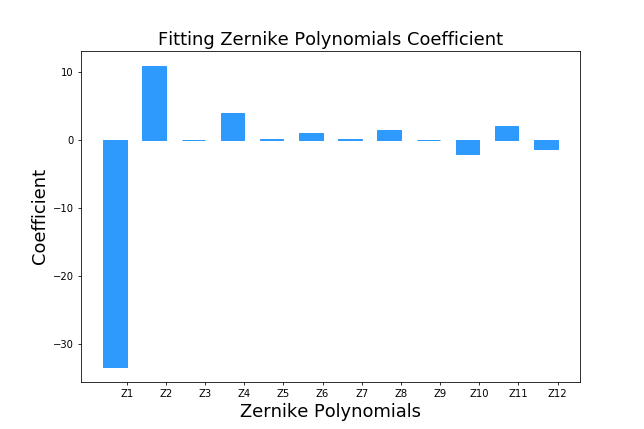

<IPython.core.display.Javascript object>


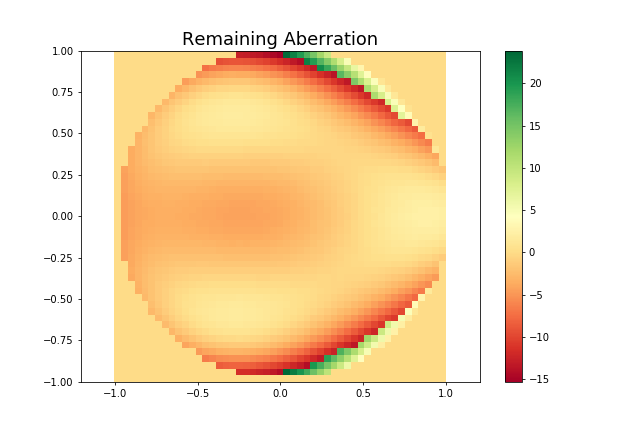

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 |10.871 |-0.059 | 3.991 | 0.143 | 1.039 | 0.157 | 1.463 | 0.009 |-2.043 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
| 2.043 |-1.394 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.000 |

<IPython.core.display.Javascript object>


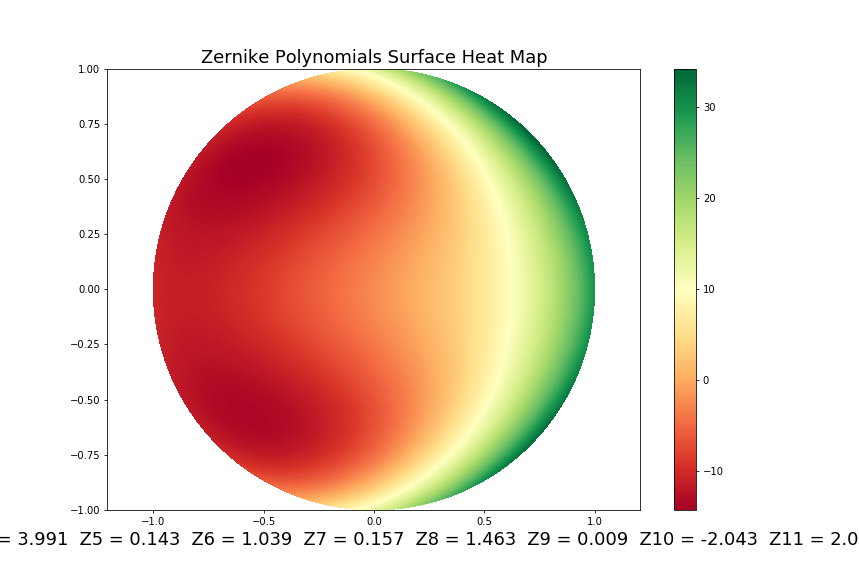

Z2 =  10.871 Z11 x Tilt
Z3 =  -0.059 Z11 y Tilt
Z4 =  3.991 Z20 Defocus
Z5 =  0.143 Z22 Primary Astigmatism at 45
Z6 =  1.039 Z22 Primary Astigmatism at 0
Z7 =  0.157 Z31 Primary y Coma
Z8 =  1.463 Z31 Primary x Coma
Z9 =  0.009 Z33 y Trefoil
Z10 =  -2.043 Z33 x Trefoil
Z11 =  2.043 Z40 Primary Spherical
Z12 =  -1.394 Z42 Secondary Astigmatism at 0


In [11]:
zs[np.isnan(zs)] = 0.
zfits, c = zernikeFit(zs)

## So let's try to make it evenly sampled

In [12]:
sxs, sys, szs = interpXYZ(xs, ys, zs, n)

## That's better.  Almost.
We are just looking at the center of the dish because we haven't figured out how to deal with NaN's and edge cases yet.

<IPython.core.display.Javascript object>


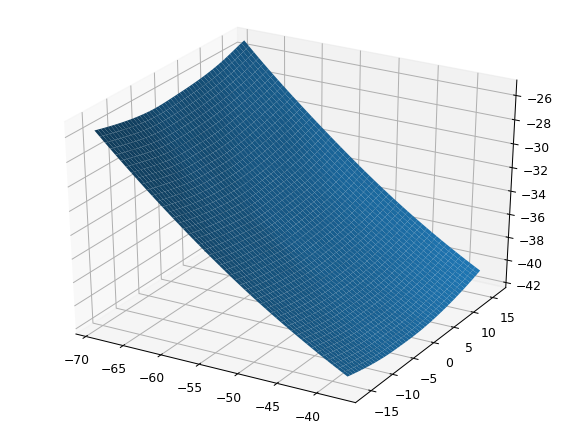

In [13]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(sxs, sys, szs)

<IPython.core.display.Javascript object>


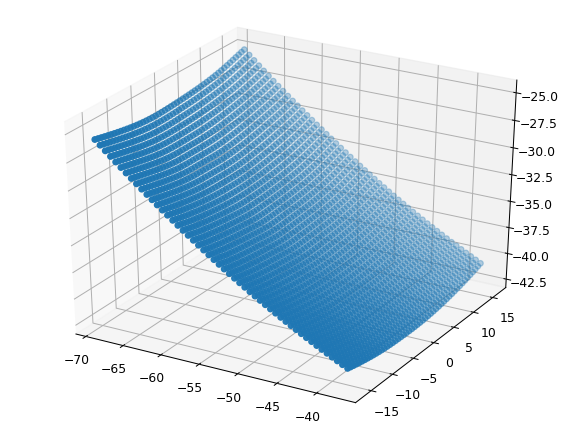

In [14]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(sxs, sys, szs)

## Now we can fit zernikes to it!
The coefficients we get actually describe it pretty well ..

<IPython.core.display.Javascript object>


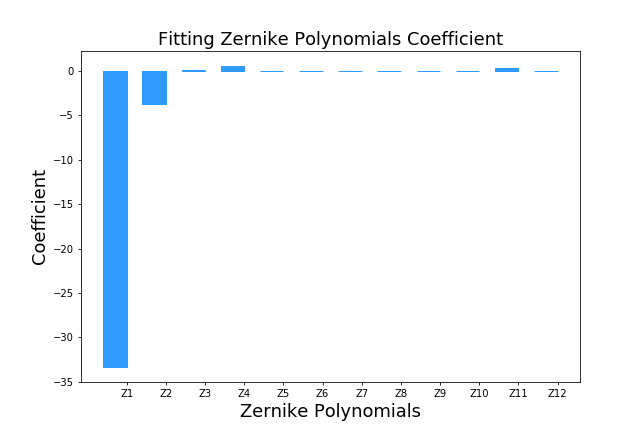

<IPython.core.display.Javascript object>


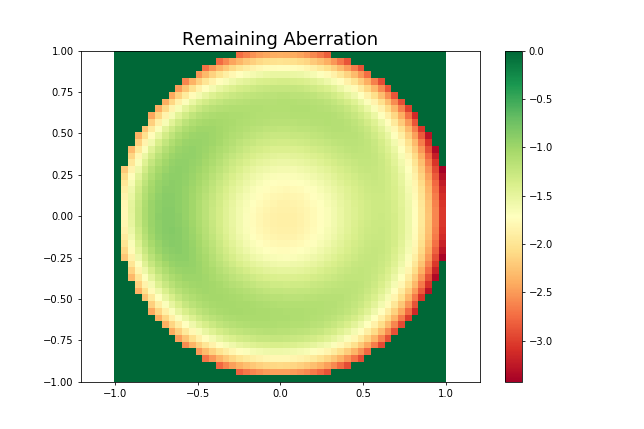

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 |-3.694 | 0.136 | 0.605 |-0.007 | 0.001 | 0.004 | 0.045 | 0.007 | 0.056 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
| 0.371 |-0.002 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.000 |

<IPython.core.display.Javascript object>


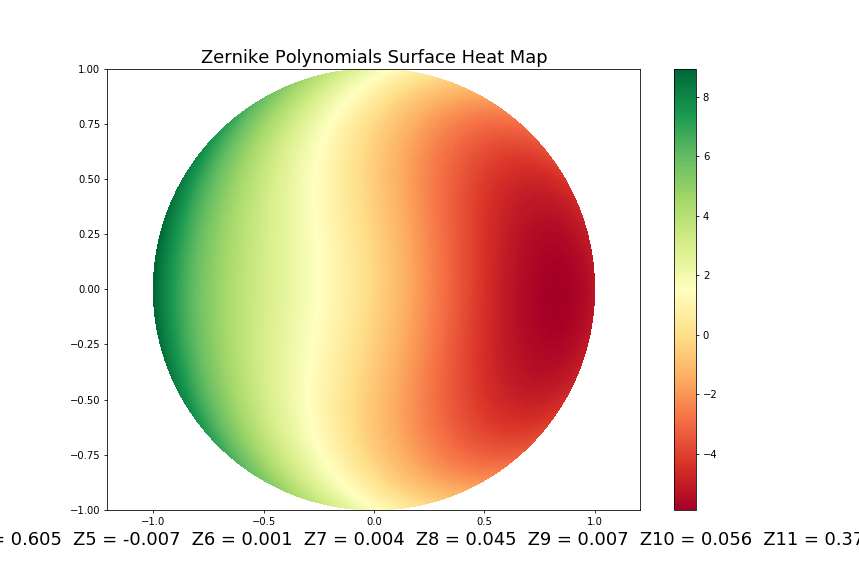

Z2 =  -3.694 Z11 x Tilt
Z3 =  0.136 Z11 y Tilt
Z4 =  0.605 Z20 Defocus
Z5 =  -0.007 Z22 Primary Astigmatism at 45
Z6 =  0.001 Z22 Primary Astigmatism at 0
Z7 =  0.004 Z31 Primary y Coma
Z8 =  0.045 Z31 Primary x Coma
Z9 =  0.007 Z33 y Trefoil
Z10 =  0.056 Z33 x Trefoil
Z11 =  0.371 Z40 Primary Spherical
Z12 =  -0.002 Z42 Secondary Astigmatism at 0


In [15]:
#zss[np.isnan(zs)] = 0.
zfits, c = zernikeFit(szs)

In [16]:
c.listcoefficient()

Z2 =  -3.694 Z11 x Tilt
Z3 =  0.136 Z11 y Tilt
Z4 =  0.605 Z20 Defocus
Z5 =  -0.007 Z22 Primary Astigmatism at 45
Z6 =  0.001 Z22 Primary Astigmatism at 0
Z7 =  0.004 Z31 Primary y Coma
Z8 =  0.045 Z31 Primary x Coma
Z9 =  0.007 Z33 y Trefoil
Z10 =  0.056 Z33 x Trefoil
Z11 =  0.371 Z40 Primary Spherical
Z12 =  -0.002 Z42 Secondary Astigmatism at 0


['Z2 = -3.694\nZ3 = 0.136\nZ4 = 0.605\nZ5 = -0.007\nZ6 = 0.001\nZ7 = 0.004\nZ8 = 0.045\nZ9 = 0.007\nZ10 = 0.056\nZ11 = 0.371\nZ12 = -0.002\n',
 'Z2 = -3.694  Z3 = 0.136  Z4 = 0.605  Z5 = -0.007  Z6 = 0.001  Z7 = 0.004  Z8 = 0.045  Z9 = 0.007  Z10 = 0.056  Z11 = 0.371  Z12 = -0.002  ']

<IPython.core.display.Javascript object>


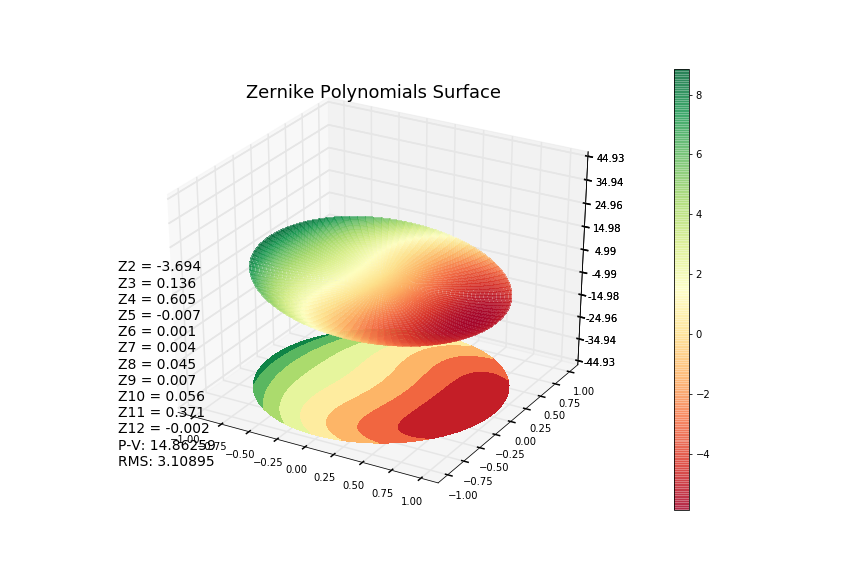

Z2 =  -3.694 Z11 x Tilt
Z3 =  0.136 Z11 y Tilt
Z4 =  0.605 Z20 Defocus
Z5 =  -0.007 Z22 Primary Astigmatism at 45
Z6 =  0.001 Z22 Primary Astigmatism at 0
Z7 =  0.004 Z31 Primary y Coma
Z8 =  0.045 Z31 Primary x Coma
Z9 =  0.007 Z33 y Trefoil
Z10 =  0.056 Z33 x Trefoil
Z11 =  0.371 Z40 Primary Spherical
Z12 =  -0.002 Z42 Secondary Astigmatism at 0


In [17]:
c.zernikesurface()